<a href="https://colab.research.google.com/github/nsalazard/EFM-analisis-de-datos-/blob/main/EFM_S11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gspread
import pandas as pd
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm, linregress
import matplotlib.colors as mcolors
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1w7-TZBuRniHM9y-tcAoGzlJ6FjRwg7z21yUO30_mwbg/edit#gid=1456024931')
worksheet=wb.worksheet('Calculos')
rows = worksheet.get_all_values()
d1=pd.DataFrame(rows)
titles=pd.DataFrame(rows)
d1.columns = d1.iloc[0]
titles=titles.iloc[0:1]
d1 = d1.iloc[1:]
d1.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Promedio,Varianza,Desviación est.,V,I
1,3463.28,3292.425859,57,600,0
2,6939.94,6667.410505,82,610,0
3,13798.77,13359.67384,116,620,0
4,20738.64,21042.75798,145,630,0
5,27696.93,27857.72232,167,640,25


In [ ]:
nombres=d1.columns[0:5]
for name in nombres:
  d1[name]= pd.to_numeric(d1[name])

In [ ]:
def f1(x,a,b):
  return a*x+b

def fo(x,a):
  return a*x 

def f2(x,a,b):
  return a*np.exp(-b*x)  

def r_sq(f,x,y,a):
  residuals = y- f(x,a)
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y-np.mean(y))**2)
  r_squared = 1 - (ss_res / ss_tot)  
  return r_squared

def ERROR(x,y,m,b):
  N = np.size(x)
  Sx,Sy,Sxx,Syy,e,em,eb,z = 0,0,0,0,0,0,0,0
  for i in range (N-1):
    Sx += x[i]
    Sy += y[i] 
    Sxx += x[i]*x[i]
    Syy += y[i]*y[i]
    z += (b+ m*x[i] - y[i])**2
  e = np.sqrt(z/((N*Sxx -Sx*Sx)*(N-2)))
  em = np.sqrt(N)*e
  eb = np.sqrt(Sxx)*e

  return (em, eb) 

0.9989791533978069
[1.01231249]
0.015050576473443636 233.79107803130836


Text(0.5, 1.0, 'Varianza en función del promedio')

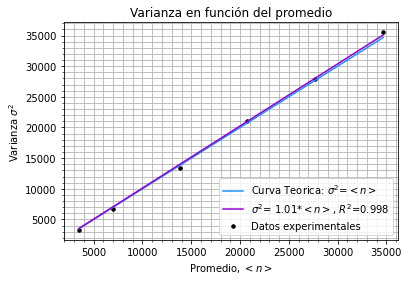

In [ ]:
valx1=d1.loc[0:6,d1.columns[0]]
valy1=d1.loc[0:6,d1.columns[1]]

x1=valx1.values 
y1=valy1.values

plt.scatter(x1,y1,color="black",s=12, zorder = 2, label = "Datos experimentales")
#gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
#plt.plot(x1, f1(x1, gradient1, intercept1),color="darkviolet", label=' $σ^2$= %2.2f*$<n>$+ %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))
plt.plot(x1, fo(x1, 1.0),color="dodgerblue", label='Curva Teorica: $σ^2$=$<n>$  ')
popt, pcov = curve_fit(fo,x1,y1)
r_squ = r_sq(fo,x1,y1,1.01)

plt.plot(x1, fo(x1,*popt),color="darkviolet", label='$σ^2$= %2.2f*$<n>$, $R^2$=0.998' %tuple(popt)) #, $R^2$= %3.3f'
print(r_squ)
print(popt)
Em, Eb = ERROR(x1,y1, 1.01,0)
print(Em, Eb)

plt.minorticks_on()
plt.grid(b=True,which="both")
plt.legend(loc="lower right") 
plt.ylabel("Varianza $σ^2$")
plt.xlabel("Promedio, $<n>$")
plt.title("Varianza en función del promedio")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Curva característica del contador Geiger Muller')

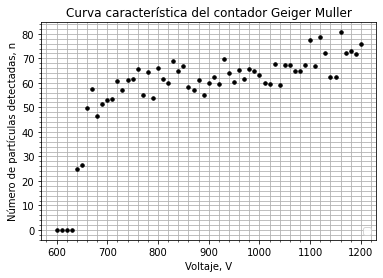

In [ ]:
valx1=d1.loc[0:61,d1.columns[3]]
valy1=d1.loc[0:61,d1.columns[4]]

x1=valx1.values 
y1=valy1.values

plt.scatter(x1,y1,color="black",s=12, zorder = 2)
gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
#plt.plot(x1, f1(x1, gradient1, intercept1),color="darkviolet", label=' Ln($N$)= %2.2f*$ε$ + %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))



plt.minorticks_on()
plt.grid(b=True,which="both")
plt.legend(loc="lower right") 
plt.ylabel("Número de partículas detectadas, n")
plt.xlabel("Voltaje, V")
plt.title("Curva característica del contador Geiger Muller")


0.004218345323520252 3.5545661032640403


Text(0.5, 0.98, 'Curva característica Geiger Muller')

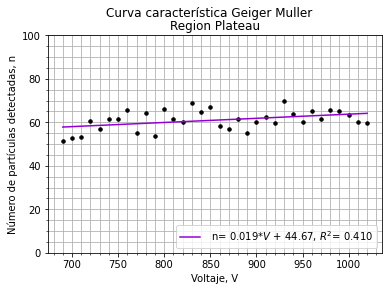

In [ ]:
valx1=d1.loc[10:43,d1.columns[3]]
valy1=d1.loc[10:43,d1.columns[4]]

x1=valx1.values 
y1=valy1.values

plt.scatter(x1,y1,color="black",s=12, zorder = 2)
gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(x1, f1(x1, gradient1, intercept1),color="darkviolet", label=' n= %2.3f*$V$ + %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))


Em, Eb = ERROR(x1,y1, gradient1,intercept1)
print(Em, Eb)

plt.minorticks_on()
plt.ylim([0, 100])
plt.grid(b=True,which="both")
plt.legend(loc="lower right") 
plt.ylabel("Número de partículas detectadas, n")
plt.xlabel("Voltaje, V")
plt.title("Region Plateau")
plt.suptitle("Curva característica Geiger Muller", fontsize=12,  fontname="Times New Roman Bold")
